In [2]:
# 영상처리와 관련된 주요 라이브러리를 불러옵니다.
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

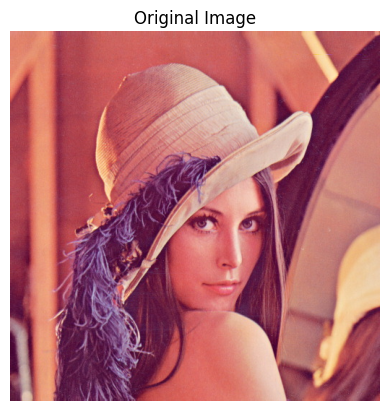

In [4]:
# 이미지를 읽어옵니다.
src = cv2.imread('lenna.bmp')

# 이미지가 정상적으로 불러졌는지 확인합니다.
if src is None:
    print('Image load failed!')
    sys.exit()

# OpenCV는 이미지를 BGR 형태로 불러오므로, matplotlib로 보여주기 위해 RGB로 변환합니다.
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# 이미지를 화면에 출력합니다.
plt.imshow(src_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

이미지를 불러오고, matplotlib로 쉽게 볼 수 있도록 색상 순서를 변환했습니다.

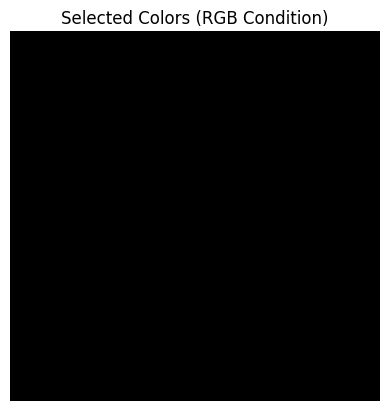

In [5]:
# 특정 RGB 범위에 해당하는 색상을 추출합니다.
dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
# B: 0~100, G: 128~255, R: 0~100

plt.imshow(dst1, cmap='gray')
plt.title('Selected Colors (RGB Condition)')
plt.axis('off')
plt.show()

RGB 채널별로 지정한 범위에 들어가는 픽셀만 흰색(255)으로 마스크하여 보여줍니다.
이 방식은 밝기가 낮은(어두운) 부분에서 잘 동작하지 않을 수 있습니다.

B (Blue): 0 ~ 100
G (Green): 128 ~ 255
R (Red): 0 ~ 100
의미:
이미지의 각 픽셀(RGB)이 이 범위에 모두 만족하는 경우에만 추출됩니다.
즉,

파란색(B) 채널 값이 0 ~ 100 사이
초록색(G) 채널 값이 128 ~ 255 사이
빨간색(R) 채널 값이 0 ~ 100 사이
모두 만족하는 픽셀만 흰색(255)으로, 나머지는 검은색(0)으로 표시됩니다.

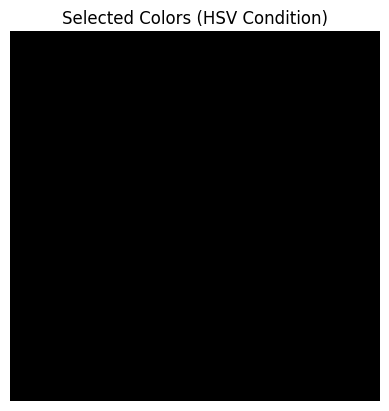

In [6]:
# 이미지를 HSV 색 공간으로 변환합니다.
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# HSV 조건을 이용해 색상을 추출합니다.
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))
# H: 50~80, S: 150~255, V: 0~255

plt.imshow(dst2, cmap='gray')
plt.title('Selected Colors (HSV Condition)')
plt.axis('off')
plt.show()

HSV 색 공간은 색상(H), 채도(S), 명도(V)로 구성되어 있어
밝기와 상관없이 색상을 더 쉽게 추출할 수 있습니다.

H (Hue, 색상): 50 ~ 80 (약 연두노랑초록 계열)
S (Saturation, 채도): 150 ~ 255 (채도가 높아야 함)
V (Value, 명도): 0 ~ 255 (명도 전체 허용)
의미:
이미지를 HSV로 변환한 뒤,

색상(H)이 50 ~ 80 (연두노랑~초록)
채도(S)가 150 ~ 255 (채도가 높음)
명도(V)는 0 ~ 255 (제한 없음)
모두 만족하는 픽셀만 흰색(255)으로, 나머지는 검은색(0)으로 표시됩니다.

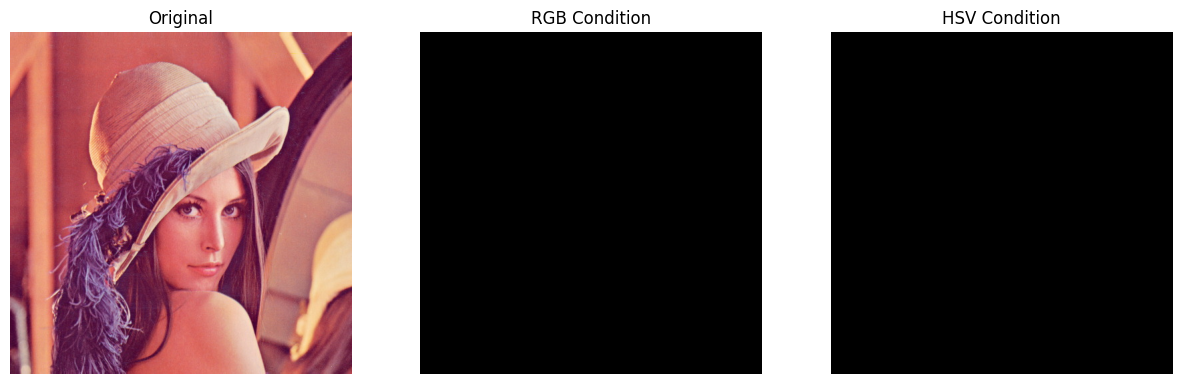

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(src_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(dst1, cmap='gray')
axes[1].set_title('RGB Condition')
axes[1].axis('off')

axes[2].imshow(dst2, cmap='gray')
axes[2].set_title('HSV Condition')
axes[2].axis('off')

plt.show()

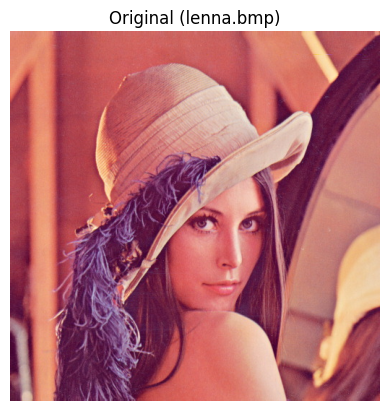

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
src = cv2.imread('lenna.bmp')
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

plt.imshow(src_rgb)
plt.title('Original (lenna.bmp)')
plt.axis('off')
plt.show()

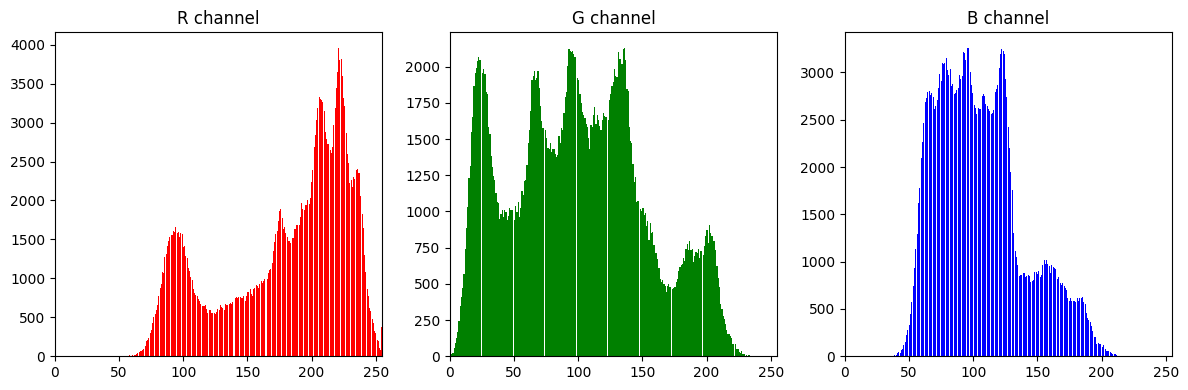

In [10]:
# 각 채널별 히스토그램 출력
plt.figure(figsize=(12, 4))
for i, color in enumerate(['R', 'G', 'B']):
    plt.subplot(1, 3, i+1)
    plt.hist(src_rgb[:,:,i].ravel(), bins=256, color=color.lower())
    plt.title(f'{color} channel')
    plt.xlim(0, 255)
plt.tight_layout()
plt.show()

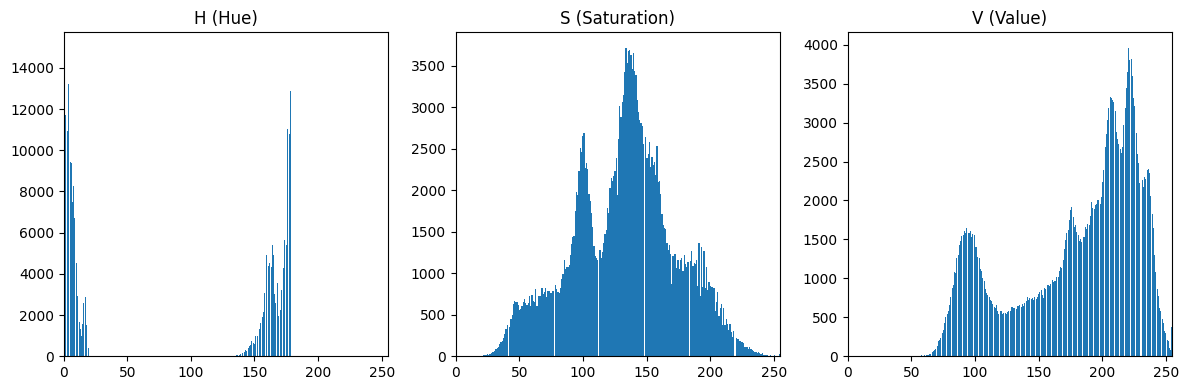

In [11]:
# HSV 각 채널별 히스토그램 출력
plt.figure(figsize=(12, 4))
labels = ['H (Hue)', 'S (Saturation)', 'V (Value)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(src_hsv[:,:,i].ravel(), bins=256)
    plt.title(labels[i])
    plt.xlim(0, 255)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


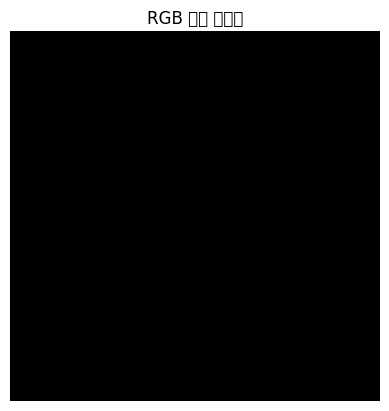

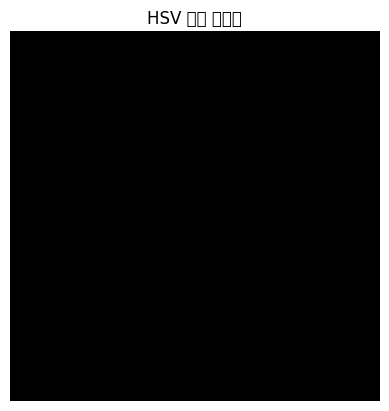

In [12]:
# RGB 조건: B 0~100, G 128~255, R 0~100
dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
plt.imshow(dst1, cmap='gray')
plt.title('RGB 추출 마스크')
plt.axis('off')
plt.show()

# HSV 조건: H 50~80, S 150~255, V 0~255
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))
plt.imshow(dst2, cmap='gray')
plt.title('HSV 추출 마스크')
plt.axis('off')
plt.show()

검은 화면의 원인 검증

(1) RGB 히스토그램 해석
lenna.bmp의 G 채널 값이 128 ~ 255에 많이 분포하는지,
동시에 R, B가 0~100에 분포하는 영역이 얼마나 되는지 확인.
대부분의 픽셀이 위 조건을 동시에 만족하기 어렵습니다.

(2) HSV 히스토그램 해석
H가 50,80 (노랑연두 계열)에 몰려있는지,
S가 150~255 (강한 채도)에 많이 분포하는지 확인.
lenna.bmp는 피부색, 붉은색, 회색 등 다양한 색이 있어 해당 범위를 동시에 만족하는 픽셀이 거의 없음.

(3) 실제 결과
이미지의 색상 분포가 추출 조건과 거의 겹치지 않으므로, inRange 결과가 대부분 0(검은색)으로 나옴.

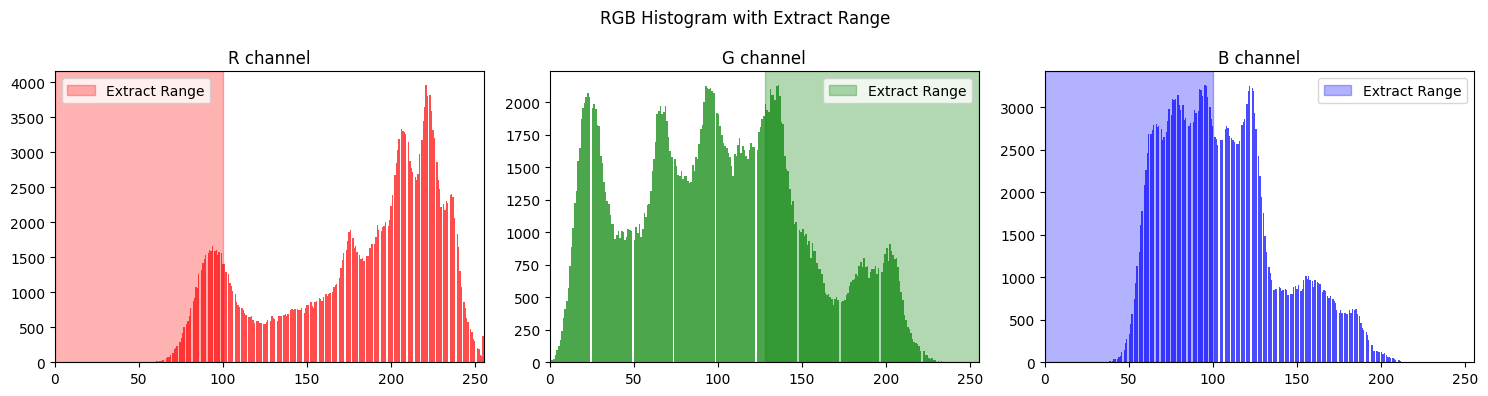

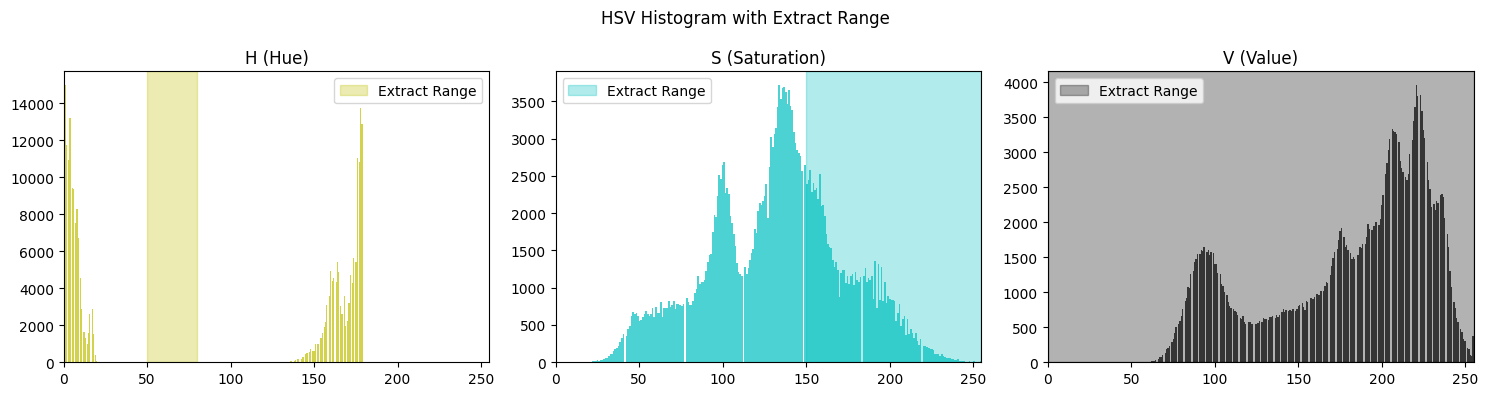

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
src = cv2.imread('lenna.bmp')
src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 1. RGB 히스토그램 + 추출 조건 표시
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
rgb_ranges = [(0, 100), (128, 255), (0, 100)]  # R, G, B
colors = ['r', 'g', 'b']
titles = ['R channel', 'G channel', 'B channel']

for i in range(3):
    axes[i].hist(src_rgb[:,:,i].ravel(), bins=256, color=colors[i], alpha=0.7)
    axes[i].set_title(titles[i])
    axes[i].set_xlim(0, 255)
    # 추출 조건 영역 표시
    axes[i].axvspan(rgb_ranges[i][0], rgb_ranges[i][1], color=colors[i], alpha=0.3, label='Extract Range')
    axes[i].legend()

plt.suptitle('RGB Histogram with Extract Range')
plt.tight_layout()
plt.show()

# 2. HSV 히스토그램 + 추출 조건 표시
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
hsv_ranges = [(50, 80), (150, 255), (0, 255)]  # H, S, V
titles = ['H (Hue)', 'S (Saturation)', 'V (Value)']
colors = ['y', 'c', 'k']  # yellow, cyan, black

for i in range(3):
    axes[i].hist(src_hsv[:,:,i].ravel(), bins=256, color=colors[i], alpha=0.7)
    axes[i].set_title(titles[i])
    axes[i].set_xlim(0, 255)
    # 추출 조건 영역 표시
    axes[i].axvspan(hsv_ranges[i][0], hsv_ranges[i][1], color=colors[i], alpha=0.3, label='Extract Range')
    axes[i].legend()

plt.suptitle('HSV Histogram with Extract Range')
plt.tight_layout()
plt.show()

lenna.bmp 이미지의 RGB와 HSV 분포 히스토그램 위에
추출 조건(RGB: B 0 ~ 100, G 128 ~ 255, R 0 ~ 100 / HSV: H 50 ~ 80, S 150 ~ 255, V 0~255)을 시각적으로 표시합니다.

각 조건 영역은 히스토그램 위에 색칠된 박스로 나타나며,
실제 이미지의 값 분포와 추출 영역이 얼마나 겹치는지 확인할 수 있습니다.

axvspan(start, end, ...) 함수로 추출 조건 영역을 히스토그램에 색칠합니다.

각 RGB/HSV 채널에 대해 추출 범위가 얼마나 데이터와 겹치는지 직관적으로 볼 수 있습니다.

대부분의 경우, lenna.bmp의 실제 분포와 추출 조건이 거의 겹치지 않아 추출 마스크가 검은색만 나옵니다.